<a href="https://colab.research.google.com/github/liyan56/Group11_CHL5230_Datathon-6/blob/main/Datathon6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install contractions
#!pip install nltk

## Load the dataset

In [ ]:
#Upload the data file

#from google.colab import files
#import io
#dataset = files.upload()

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

# Read the data from a CSV file named "covid_vaccine.csv" into a DataFrame
df = pd.read_csv(io.BytesIO(dataset["Datathon 6_ Data_Collection.csv"]))

# Select specific columns from the DataFrame
df = df[['Title', 'Abstract', 'Discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Title,Abstract,Discussion
0,A machine learning-based framework to identify...,Objective To discover diverse genotype-phenoty...,Expert algorithm-based identification of T2DM ...
1,Machine learning techniques for diabetic macul...,Background Spectral domain optical coherence t...,Evaluations of individual features (see Table ...
2,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
3,Machine-learning to stratify diabetic patients...,Background Diabetes mellitus is a chronic dise...,Machine-learning can be applied as a systems b...
4,Data-driven modeling and prediction of blood g...,Background Diabetes mellitus (DM) is a metabol...,"5.1. Principal findings Recently, machine lear..."


## Data Cleaning

In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    text = re.sub("[\(\[].*?[\)\]]", "", text)  # Replace all the reference number with empty string
    text = re.sub(r"\s\([A-Z][a-z]+,\s[A-Z][a-z]?\.[^\)]*,\s\d{4}\)", "", text) # Replace all in-text ciation with empty string
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'tweet' column of the DataFrame.
df['Discussion'] = df['Discussion'].apply(clean_encoding)

In [ ]:
# Combine all the title, abstarct, and discussion columns into one
df['combine'] = df[df.columns[0:]].apply(
    lambda x: '. '.join(x.dropna().astype(str)),
    axis=1
)

# Handling Text Contractions in Preprocessing
import contractions
df['combine_expanded'] = df['combine'].apply(lambda x: contractions.fix(x))

###Text Data Standardization

In [ ]:
# Let's perform some basic data cleaning tasks such as:
# - Converting the date column to datetime
# - Lowercasing the texts
# - Removing URLs
# - Removing special characters and numbers
# - Correcting the spelling of "Neutral" in Emotion column

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', ' ', text)

# Perform the data cleaning
df['combine'] = df['combine_expanded'].str.lower()
df['combine'] = df['combine'].apply(remove_url)
df['combine'] = df['combine'].apply(remove_special_characters)

###Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['combine'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'combine', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['combine', 'tokens', 'tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,combine,tokens,tokens_no_stop
0,a machine learning based framework to identify...,"[a, machine, learning, based, framework, to, i...","[machine, learning, based, framework, identify..."
1,machine learning techniques for diabetic macul...,"[machine, learning, techniques, for, diabetic,...","[machine, learning, techniques, diabetic, macu..."
2,machine learning methods to predict diabetes c...,"[machine, learning, methods, to, predict, diab...","[machine, learning, methods, predict, diabetes..."
3,machine learning to stratify diabetic patients...,"[machine, learning, to, stratify, diabetic, pa...","[machine, learning, stratify, diabetic, patien..."
4,data driven modeling and prediction of blood g...,"[data, driven, modeling, and, prediction, of, ...","[data, driven, modeling, prediction, blood, gl..."


###Identify stop words

In [ ]:
# Define additional context-sensitive stop words

context_sensitive_stop_words = set(['diabetes', 'diabetics', 'dm', 'machine', 'learning', 'model', 'et', 'al', 'algorithm',
                                    'algorithms', 'objective', 'methods', 'method', 'results', 'conclusion', 'data',
                                    'dataset', 'framework', 'based', 'techniques', 'models', 'use', 'used', 'using',
                                    'study', 'studies', 'approach', 'approaches', 'ml'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['combine', 'tokens', 'tokens_no_stop_context']].head()

,combine,tokens,tokens_no_stop_context
0,a machine learning based framework to identify...,"[a, machine, learning, based, framework, to, i...","[identify, type, electronic, health, records, ..."
1,machine learning techniques for diabetic macul...,"[machine, learning, techniques, for, diabetic,...","[diabetic, macular, edema, dme, classification..."
2,machine learning methods to predict diabetes c...,"[machine, learning, methods, to, predict, diab...","[predict, complications, one, areas, artificia..."
3,machine learning to stratify diabetic patients...,"[machine, learning, to, stratify, diabetic, pa...","[stratify, diabetic, patients, novel, cardiac,..."
4,data driven modeling and prediction of blood g...,"[data, driven, modeling, and, prediction, of, ...","[driven, modeling, prediction, blood, glucose,..."


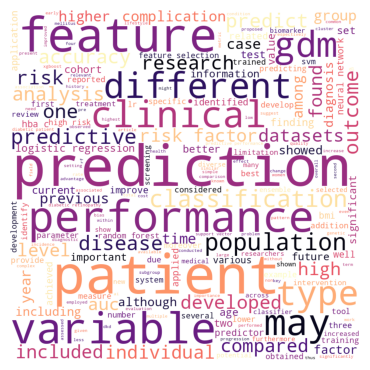

In [ ]:
#generate a word cloud visualizing the most frequent words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

###Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


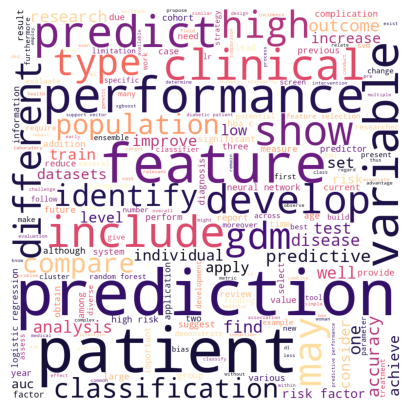

In [ ]:
# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Highlighted keywords from the wordcloud:

classification (type of analysis)

gdm (gestational diabetes mellitus is the most common research topic over the last 10 years)

logistic regresssion and neutral network (most commonly used machine learning mdoel)






